# An analysis of the diabetes data in the United States
                                                                                            By: David Ugochukwu Asogwa
                                                                                            July 19, 2022
The dataset represents a record of 10 years of diabetes patients treatment and hospital visitation in the United States from 1999 to 2008. The dataset contains clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Included in the features are race, gender, age, diabetes medication and more. Analysis and visualizations will be performed using this data to derive insights on the relationships between diabetes patients and age, weight, race, gender, insulin level and effects of medications when recommended. The dataset contains 101,766 rows and 51 columns.

To carry out this analysis, the data integrity have to be verified in other to clean up quality and tidiness issues.

Dataset obtained from Kaggle: https://www.kaggle.com/datasets/jimschacko/10-years-diabetes-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

#reading csv file and accessing
diabetes = pd.read_csv('diabetes.csv')

# <span style = 'color:blue'> Assessing Data set</span>

In [2]:
print(diabetes.shape)
diabetes.head()

(101766, 51)


,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<span style = 'color:blue'>This dataset appears not to be clean. From the weight column, there are missing values seen as **question marks (?)**. There is a high probability same might have occured in other columns and these values will be huge. Let's explore, find out the quality and tidiness issues and profer solutions.</span>

In [3]:
diabetes.describe()

,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50883.500000,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,29377.458084,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25442.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,50883.500000,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,76324.750000,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,101766.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
diabetes.isnull().sum()

id                          0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamid

<span style = 'color:blue'>All columns are filled. No missing values.</span>

In [5]:
diabetes.duplicated().sum()

0

<span style = 'color:blue'>The dataset as a whole has no duplicated value.</span>

In [6]:
print(diabetes.patient_nbr.duplicated().sum())
print(diabetes.encounter_id.duplicated().sum())

30248
0


In [7]:
print(diabetes.patient_nbr.nunique())
print(diabetes.encounter_id.nunique())

71518
101766


In [8]:
print('Patient_nbr has {} unique values and {} duplicates, summing up to {}'
      .format(diabetes.patient_nbr.nunique(), diabetes.patient_nbr.duplicated().sum(),
      diabetes.patient_nbr.nunique() + diabetes.patient_nbr.duplicated().sum()));

Patient_nbr has 71518 unique values and 30248 duplicates, summing up to 101766


<span style = 'color:blue'>Checking the **patient_nbr** for duplicated values, there appears to be **30,248 duplicates**. To further buttress this observation, **encounter_id** was checked for duplicates and it turned out to be **zero (0)**. This means the duplicates in the patient_nbr are not actually duplicates but **patients that had multiple checks/treatments**, and since their patient_nbr is unique, it cannot be changed, unlike the encounter_id.</span>

In [9]:
# count function
def count(df, df_string, column_name):
    """
    A fuction to count values in a column, and displays the results.
    
    Args:
        df: dataset or dataframe
        df_string: dataframe name as a string
        column_name: name of column to count values
    """
    print('Here are the results from {} column in {} dataset'.format(column_name, df_string))
    return df[column_name].value_counts()

In [10]:
count(diabetes, 'diabetes', 'race')

Here are the results from race column in diabetes dataset


Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

<span style = 'color:blue'>Values with **question mark (?)** will be replaced with **other**, since they are unknown, and **AfricanAmerican** replaced with **African-American**</span>

In [11]:
count(diabetes,'diabetes', 'gender')

Here are the results from gender column in diabetes dataset


Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [12]:
count(diabetes,'diabetes', 'weight')

Here are the results from weight column in diabetes dataset


?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

<span style = 'color:blue'> Most the values in the weight column are missing. Let's investigate to know what percentage are actually missing.</span>

In [13]:
(count(diabetes,'diabetes', 'weight')/diabetes.shape[0]) * 100

Here are the results from weight column in diabetes dataset


?            96.858479
[75-100)      1.312816
[50-75)       0.881434
[100-125)     0.614154
[125-150)     0.142484
[25-50)       0.095317
[0-25)        0.047167
[150-175)     0.034393
[175-200)     0.010809
>200          0.002948
Name: weight, dtype: float64

<span style = 'color:blue'>Approximately **97%** of this column is unknown. It will be dropped.</span>

In [14]:
count(diabetes,'diabetes', 'admission_type_id')

Here are the results from admission_type_id column in diabetes dataset


1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

<span style = 'color:blue'>The admission_type_id does not really communicate what it stands for without looking at the feature definition. This will be mapped with their id definitions and also renamed to **admission_type**.</span>

In [15]:
count(diabetes,'diabetes', 'admission_source_id')

Here are the results from admission_source_id column in diabetes dataset


7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [16]:
count(diabetes,'diabetes', 'medical_specialty')

Here are the results from medical_specialty column in diabetes dataset


?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

<span style = 'color:blue'>Showing the patients preference for a specialty, the dataset contains rows with unknown values. These rows will be replaced with **Other**.</span>

In [17]:
count(diabetes,'diabetes', 'number_outpatient')

Here are the results from number_outpatient column in diabetes dataset


0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
18        5
22        5
19        3
27        3
24        3
26        2
23        2
25        2
33        2
35        2
36        2
29        2
34        1
39        1
42        1
28        1
37        1
38        1
40        1
Name: number_outpatient, dtype: int64

In [18]:
count(diabetes,'diabetes', 'number_emergency')

Here are the results from number_emergency column in diabetes dataset


0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: number_emergency, dtype: int64

In [19]:
count(diabetes,'diabetes', 'number_inpatient')

Here are the results from number_inpatient column in diabetes dataset


0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: number_inpatient, dtype: int64

<span style = 'color:blue'>The **number_outpatient**, **number_emergency** and **number_inpatient** indicate the number of times these events occur, that is, how many times there was ana emergency, number of times the patient was an inpatient and outpatient.</span>

In [20]:
count(diabetes,'diabetes', 'number_diagnoses')

Here are the results from number_diagnoses column in diabetes dataset


9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

In [21]:
count(diabetes,'diabetes', 'max_glu_serum')

Here are the results from max_glu_serum column in diabetes dataset


None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

<span style = 'color:blue'>Column looks good, but will be renamed to **glucose_serum**, and **Norm** replaced with **Normal**</span>

In [22]:
count(diabetes,'diabetes', 'A1Cresult')

Here are the results from A1Cresult column in diabetes dataset


None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

<span style = 'color:blue'>Rename to **A1C_result** and **Norm** replaced with **Normal**, numerical values replaced with **Greater than 8** and **Greater than 7**</span>

In [23]:
count(diabetes,'diabetes', 'metformin')

Here are the results from metformin column in diabetes dataset


No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [24]:
count(diabetes,'diabetes', 'insulin')

Here are the results from insulin column in diabetes dataset


No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [25]:
count(diabetes,'diabetes', 'change')

Here are the results from change column in diabetes dataset


No    54755
Ch    47011
Name: change, dtype: int64

<span style = 'color:blue'>Having only two values here, **No** and **Ch**, the **Ch** will be replaced with **Yes**.</span>

In [26]:
count(diabetes,'diabetes', 'readmitted')

Here are the results from readmitted column in diabetes dataset


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

<span style = 'color:blue'> **NO** will be changed to **No**, **>30** to **Over 30 days** and **<30** to **Below 30 days**</span>

In [27]:
count(diabetes, 'diabetes', 'age')

Here are the results from age column in diabetes dataset


[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

<span style = 'color:blue'>The formating of this column is not accurate. The square bracket and braces will be removed.</span>

In [28]:
list(diabetes.columns)

['id',
 'encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide.metformin',
 'glipizide.metformin',
 'glimepiride.pioglitazone',
 'metformin.rosiglitazone',
 'metformin.pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

#### <span style = 'color:blue'>Issues</span>
1. Drop columns: **id, encounter_id, payer_code, weight, discharge_disposition_id, num_procedures, diag_1, diag_2, diag_3,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,
rosiglitazon,acetohexamide,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide.metformin,
glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone**.
2. Rename **patient_nbr** to **patient_id**, **time_in_hospital** to **days_in_hospital**, **number_outpatient, number_emergency, number_inpatient** to **outpatient, emergency, inpatient**, **max_glucose_serum** to **glucose_serum**, **A1Cresult** to **A1C_result**, **admission_source_id** to **admission_source**, **admission_type_id** to **admission_type**, **number_diagnoses** to **diagnosis**, **diabetesMed** to **medications**, **num_lab_procedures** to **lab_procedures**, **num_medications** to **num_of_medications**.
3. Non-consistent patient_nbr. Add **0** in front of numbers less than 9.
4. Replace **(?)**, and **AfricanAmerican** in race with **other** and **African_American**, **?** in medical_specialty with **other**.
5. Replace numerical values in **admission_type_id** with mappings: 1:Emergency, 2:Urgent, 3:Elective, 4:New_born, 5:Not_available, 6:Null, 7:Trauma_center, 8:Not_mapped.
6. Change numerical values in **admission_source_id** to mappings.
7. Replace **ch** in **change** with **Yes**, **Norm** with **Normal** in the whole dataset, **NO** in readmitted to **No**
8. Replace **>8** and **>7** in **A1C_result** with **Greater than 8** and **Greater than 7** respectively, replace **>200** and **>300** in glucose_serum with **Greater than 200** and **Greater than 300** respectively, and **None** with **No test**
9. Remove braces from **age** column.

# <span style = 'color:blue'> Cleaning</span>

<span style = 'color:blue'>Issue 1</span>

In [29]:
drop_columns = ['id','encounter_id','weight','discharge_disposition_id','payer_code','diag_1','diag_2','diag_3',
                'num_procedures','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide',
                'glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide',
                'examide','citoglipton','glyburide.metformin','glipizide.metformin','glimepiride.pioglitazone',
                'metformin.rosiglitazone','metformin.pioglitazone',]
diabetes.drop(columns = drop_columns, inplace = True)

In [30]:
diabetes.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

<span style = 'color:blue'>Issue 2</span>

In [31]:
diabetes.rename(columns = {'patient_nbr':'patient_id','time_in_hospital':'days_in_hospital',
                           'number_outpatient':'outpatient','number_emergency':'emergency',
                           'number_inpatient':'inpatient','max_glu_serum':'glucose_serum','A1Cresult':'A1C_result',
                           'admission_source_id':'admission_source','admission_type_id':'admission_type',
                           'number_diagnoses':'diagnosis','diabetesMed':'medications',
                           'num_lab_procedures':'lab_procedures','num_medications':'num_of_medications'}, inplace = True)

In [32]:
diabetes.columns

Index(['patient_id', 'race', 'gender', 'age', 'admission_type',
       'admission_source', 'days_in_hospital', 'medical_specialty',
       'lab_procedures', 'num_of_medications', 'outpatient', 'emergency',
       'inpatient', 'diagnosis', 'glucose_serum', 'A1C_result', 'metformin',
       'insulin', 'change', 'medications', 'readmitted'],
      dtype='object')

<span style = 'color:blue'>Issue 3</span>

In [33]:
diabetes['patient_id'] = diabetes['patient_id'].astype(str)
diabetes['patient_id'] = [((9 - len(i)) * str(0)) + i for i in diabetes.patient_id]

In [34]:
for i in diabetes.patient_id:
    if len(i) != len(diabetes.patient_id.max()):
        print('Error!!! Inconsistent length found!!!')
        break
    else:
        print('All good!!!')
        break

All good!!!


In [35]:
diabetes.head()

,patient_id,race,gender,age,admission_type,admission_source,days_in_hospital,medical_specialty,lab_procedures,num_of_medications,...,emergency,inpatient,diagnosis,glucose_serum,A1C_result,metformin,insulin,change,medications,readmitted
0,008222157,Caucasian,Female,[0-10),6,1,1,Pediatrics-Endocrinology,41,1,...,0,0,1,None,None,No,No,No,No,NO
1,055629189,Caucasian,Female,[10-20),1,7,3,?,59,18,...,0,0,9,None,None,No,Up,Ch,Yes,>30
2,086047875,AfricanAmerican,Female,[20-30),1,7,2,?,11,13,...,0,1,6,None,None,No,No,No,Yes,NO
3,082442376,Caucasian,Male,[30-40),1,7,2,?,44,16,...,0,0,7,None,None,No,Up,Ch,Yes,NO
4,042519267,Caucasian,Male,[40-50),1,7,1,?,51,8,...,0,0,5,None,None,No,Steady,Ch,Yes,NO


<span style = 'color:blue'>Issue 4</span>

In [36]:
diabetes['race'].replace({'?':'Others', 'Other':'Others', 'AfricanAmerican':'African_American'}, inplace = True)
diabetes['medical_specialty'] = diabetes['medical_specialty'].replace('?', 'Others')

In [37]:
count(diabetes, 'diabetes', 'race')

Here are the results from race column in diabetes dataset


Caucasian           76099
African_American    19210
Others               3779
Hispanic             2037
Asian                 641
Name: race, dtype: int64

In [38]:
count(diabetes, 'diabetes', 'medical_specialty')

Here are the results from medical_specialty column in diabetes dataset


Others                           49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

<span style = 'color:blue'>Issue 5</span>

In [39]:
diabetes['admission_type'].replace({1:'Emergency', 2:'Urgent', 3:'Elective', 4:'New born', 5:'Not available', 
                                    6:'Not available',7:'Trauma center', 8:'Not available'}, inplace = True)

In [40]:
count(diabetes, 'diabetes', 'admission_type')

Here are the results from admission_type column in diabetes dataset


Emergency        53990
Elective         18869
Urgent           18480
Not available    10396
Trauma center       21
New born            10
Name: admission_type, dtype: int64

<span style = 'color:blue'>Issue 6</span>

In [41]:
diabetes['admission_source'].replace({1:'PR',2:'CR',3:'HMOR',4:'TH',5:'TSNF',6:'THCF',7:'ER',8:'C/LE',9:'NA',10:'TCAH',
                                      11:'ND',12:'PD',13:'SB',14:'EB',17:'NA',18:'TAHHA',19:'RSHHA',20:'NA',21:'NA',
                                      22:'TSHI',23:'BIH',24:'BOH',25:'TASC',26:'THs'}, inplace = True)

<span style = 'color:blue'>To shorten the words used here in, the following definitions were made:</span>
1. **PR**: Physical Referral
2. **CR**: Clinical Referral
3. **HMOR**: HMO Referral
4. **TH**: Transfer from Hospital
5. **TSNF**: Transfer from a Skilled Nursing Facility
6. **THCF**: Transfer from Health Care Facility
7. **ER**: Emergency Room
8. **C/LE**: Court/Law Enforcement
9. **NA**: Not Available
10. **TCAH**: Transfer from Critical Access Hospital
11. **ND**: Normal Delivery
12. **PD**: Premature Delivery
13. **SB**: Sick Baby
14. **EB**: Extramural Birth
15. Already defined in number 9.
16. No definition given.
17. **Null** was replaced with **NA**
18. **TAHHA**: Transfer From Another Home Health Agency
19. **RSHHA**: Readmission to Same Home Health Agency
20. **Not Mapped** replaced with **NA**
21. **Unknown/Invalid** replaced with **NA**
22. **TSHI**: Transfer from hospital inpt/same fac reslt in a sep claim
23. **BIH**: Born inside this hospital
24. **BOH**: Born outside this hospital
25. **TASC**: Transfer from Ambulatory Surgery Center
26. **THs**: Transfer from Hospice

In [42]:
count(diabetes, 'diabetes', 'admission_source')

Here are the results from admission_source column in diabetes dataset


ER      57494
PR      29565
NA       7067
TH       3187
THCF     2264
CR       1104
TSNF      855
HMOR      187
C/LE       16
TSHI       12
TCAH        8
EB          2
ND          2
TASC        2
SB          1
Name: admission_source, dtype: int64

<span style = 'color:blue'>Issue 7</span>

In [43]:
diabetes['change'] = diabetes['change'].replace('Ch', 'Yes')
diabetes['readmitted'].replace({'NO':'No', '>30':'Over 30 days', '<30':'Below 30 days'}, inplace = True)
diabetes = diabetes.replace('Norm', 'Normal')

In [44]:
count(diabetes, 'diabetes', 'change')

Here are the results from change column in diabetes dataset


No     54755
Yes    47011
Name: change, dtype: int64

In [45]:
count(diabetes, 'diabetes', 'readmitted')

Here are the results from readmitted column in diabetes dataset


No               54864
Over 30 days     35545
Below 30 days    11357
Name: readmitted, dtype: int64

In [46]:
for cell_value in diabetes:
    if cell_value == 'Norm':
        print('Error detected!!!')
        break
    else:
        print('All good!!!')
        break

All good!!!


<span style = 'color:blue'>Issue 8</span>

In [47]:
diabetes['A1C_result'].replace({'>8':'Greater than 8', '>7':'Greater than 7', 'None':'No test'}, inplace = True)
diabetes['glucose_serum'].replace({'>200':'Greater than 200', '>300':'Greater than 300', 'None':'No test'}, inplace = True)

In [48]:
count(diabetes, 'diabetes', 'A1C_result')

Here are the results from A1C_result column in diabetes dataset


No test           84748
Greater than 8     8216
Normal             4990
Greater than 7     3812
Name: A1C_result, dtype: int64

In [49]:
count(diabetes, 'diabetes', 'glucose_serum')

Here are the results from glucose_serum column in diabetes dataset


No test             96420
Normal               2597
Greater than 200     1485
Greater than 300     1264
Name: glucose_serum, dtype: int64

<span style = 'color:blue'>Issue 9</span>

In [50]:
diabetes[['one','two']] = diabetes.age.str.split('[', expand = True)
diabetes[['age','three']] = diabetes.two.str.split(')', expand = True)
diabetes.drop(columns = {'one', 'two', 'three'}, inplace = True)

In [51]:
count(diabetes, 'diabetes', 'age')

Here are the results from age column in diabetes dataset


70-80     26068
60-70     22483
50-60     17256
80-90     17197
40-50      9685
30-40      3775
90-100     2793
20-30      1657
10-20       691
0-10        161
Name: age, dtype: int64

#### <span style = 'color:blue'> Having gathered the features needed for analysis (this can vary depending on the analyst and the question or relationship one wants to establish or verify), let's take a look at the datatypes for visualization suitability.</span>

In [52]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   patient_id          101766 non-null  object
 1   race                101766 non-null  object
 2   gender              101766 non-null  object
 3   age                 101766 non-null  object
 4   admission_type      101766 non-null  object
 5   admission_source    101766 non-null  object
 6   days_in_hospital    101766 non-null  int64 
 7   medical_specialty   101766 non-null  object
 8   lab_procedures      101766 non-null  int64 
 9   num_of_medications  101766 non-null  int64 
 10  outpatient          101766 non-null  int64 
 11  emergency           101766 non-null  int64 
 12  inpatient           101766 non-null  int64 
 13  diagnosis           101766 non-null  int64 
 14  glucose_serum       101766 non-null  object
 15  A1C_result          101766 non-null  object
 16  me

<span style = 'color:blue'> The following features will have their datatype converted as follows for proper visualization:</span>
1. race, gender, age, admission_type, change, medications admission_source, medical_specialty, glucose_serum, A1c_result, metformin, insulin, readmitted will be converted to categorical data type.

<span style = 'color:blue'>To solve these issues since they all involve data type conversion, a function will be created to avoid code repetition.</span>

In [53]:
def ChangeDtype(df, column_name, data_type):
    """
    A function that converts the data type of a column in a dataframe from it's original type to the stated type.
    
    ARGS:
        df: Dataframe
        column_name: Column to be converted. Input as a string enclosed in double or single quotes.
        data_type: New data type as a string enclosed in quotes.
    """
    try:
        df[column_name] = df[column_name].astype(data_type)
        #print('Operation Successful !!!')
        #print('New data type is {}\n'.format(df[column_name].dtypes))
    except:
        print('Operation Failed !!! Check parameters and try again.')
    

<span style = 'color:blue'> Issue 1</span>

In [54]:
ChangeDtype(diabetes, 'race', 'category')
ChangeDtype(diabetes, 'gender', 'category')
ChangeDtype(diabetes, 'age', 'category')
ChangeDtype(diabetes, 'admission_type', 'category')
ChangeDtype(diabetes, 'admission_source', 'category')
ChangeDtype(diabetes, 'medical_specialty', 'category')
ChangeDtype(diabetes, 'glucose_serum', 'category')
ChangeDtype(diabetes, 'A1C_result', 'category')
ChangeDtype(diabetes, 'metformin', 'category')
ChangeDtype(diabetes, 'insulin', 'category')
ChangeDtype(diabetes, 'readmitted', 'category')
ChangeDtype(diabetes, 'change', 'category')
ChangeDtype(diabetes, 'medications', 'category')

#### <span style = 'color:blue'> Final Verifications</span>

In [55]:
diabetes.head()

,patient_id,race,gender,age,admission_type,admission_source,days_in_hospital,medical_specialty,lab_procedures,num_of_medications,...,emergency,inpatient,diagnosis,glucose_serum,A1C_result,metformin,insulin,change,medications,readmitted
0,008222157,Caucasian,Female,0-10,Not available,PR,1,Pediatrics-Endocrinology,41,1,...,0,0,1,No test,No test,No,No,No,No,No
1,055629189,Caucasian,Female,10-20,Emergency,ER,3,Others,59,18,...,0,0,9,No test,No test,No,Up,Yes,Yes,Over 30 days
2,086047875,African_American,Female,20-30,Emergency,ER,2,Others,11,13,...,0,1,6,No test,No test,No,No,No,Yes,No
3,082442376,Caucasian,Male,30-40,Emergency,ER,2,Others,44,16,...,0,0,7,No test,No test,No,Up,Yes,Yes,No
4,042519267,Caucasian,Male,40-50,Emergency,ER,1,Others,51,8,...,0,0,5,No test,No test,No,Steady,Yes,Yes,No


In [56]:
diabetes.sample(10)

,patient_id,race,gender,age,admission_type,admission_source,days_in_hospital,medical_specialty,lab_procedures,num_of_medications,...,emergency,inpatient,diagnosis,glucose_serum,A1C_result,metformin,insulin,change,medications,readmitted
68102,107047836,Caucasian,Male,70-80,Elective,PR,5,Others,36,27,...,0,0,9,No test,No test,No,Down,Yes,Yes,No
91590,180933197,Caucasian,Female,70-80,Urgent,ER,5,Surgery-General,62,12,...,0,0,7,No test,No test,No,No,No,No,No
42082,060242445,Caucasian,Male,50-60,Elective,PR,1,InternalMedicine,35,5,...,0,0,4,No test,No test,No,No,No,No,Over 30 days
96560,038075310,Caucasian,Female,60-70,Elective,PR,3,Podiatry,29,20,...,0,0,9,No test,No test,No,Steady,Yes,Yes,Over 30 days
100021,047564019,African_American,Male,60-70,Emergency,ER,6,Emergency/Trauma,55,10,...,0,0,8,No test,No test,Steady,No,No,Yes,No
16099,020256840,Caucasian,Male,50-60,Elective,PR,4,Orthopedics,22,18,...,0,0,6,No test,No test,No,No,No,No,No
71253,101864286,Caucasian,Male,70-80,Urgent,ER,4,Emergency/Trauma,42,13,...,0,0,9,No test,Normal,No,Steady,No,Yes,No
6713,024161193,Caucasian,Male,40-50,Emergency,NA,2,Others,25,7,...,0,0,3,Greater than 300,No test,No,Down,Yes,Yes,Over 30 days
69216,053240535,Caucasian,Female,80-90,Emergency,ER,2,Others,35,17,...,1,1,3,No test,No test,No,Steady,Yes,Yes,No
4484,009358875,Caucasian,Male,50-60,Elective,PR,6,Orthopedics,2,15,...,0,0,8,No test,No test,No,No,No,No,Over 30 days


In [57]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   patient_id          101766 non-null  object  
 1   race                101766 non-null  category
 2   gender              101766 non-null  category
 3   age                 101766 non-null  category
 4   admission_type      101766 non-null  category
 5   admission_source    101766 non-null  category
 6   days_in_hospital    101766 non-null  int64   
 7   medical_specialty   101766 non-null  category
 8   lab_procedures      101766 non-null  int64   
 9   num_of_medications  101766 non-null  int64   
 10  outpatient          101766 non-null  int64   
 11  emergency           101766 non-null  int64   
 12  inpatient           101766 non-null  int64   
 13  diagnosis           101766 non-null  int64   
 14  glucose_serum       101766 non-null  category
 15  A1C_result       

#### <span style = 'color:blue'>Saving cleaned data set</span>

In [58]:
diabetes.to_csv('Disbetes_Master.csv', index = False)

# <span style = 'color:blue'> Visualizations</span>

### <span style = 'color:blue'> Univariate Plot Functions</span>

In [131]:
def Plot_hist(df, x_parameter, title, x_label, y_label):
    """
    A function that plots the histogram distribution of a feature in a given dataframe.
    
    Args:
        df: dataframe
        x_parameter: Feature to be plotted inputed as string with quoatation marks.
        title: Histogram title inputed as string with quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks.
        y_label: y_axis label inputed as string with quoatation marks.
    """
    plt.figure(figsize = [8,6])
    plt.hist(data = df, x = x_parameter)
    plt.title(title, size = 15, weight = 'bold')
    plt.xlabel(x_label, size = 'large', weight = 'bold')
    plt.ylabel(y_label, size = 'large', weight = 'bold')
    
def Count_plot(df, x_parameter, order, title, x_label, y_label):
    """
    A function that plots the histogram distribution of a feature in a given dataframe using seaborn countplot.
    
    Args:
        df: dataframe
        x_parameter: Feature to be plotted inputed as string with quoatation marks.
        title: Histogram title inputed as string with quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks.
        y_label: y_axis label inputed as string with quoatation marks.
    """
    plt.figure(figsize = [8,6])
    ax = sb.countplot(data = df, x = x_parameter, color = sb.color_palette()[0], order = order)
    plt.title(title, size = 15, weight = 'bold')
    plt.xlabel(x_label, size = 'large', weight = 'bold')
    plt.ylabel(y_label, size = 'large', weight = 'bold')
    for p in ax.patches:
#         ax.annotate('{:.2f}%'.format((p.get_height()/df.shape[0])*100), (p.get_x(), p.get_height()),
#                    ha = 'left', va = 'center_baseline', xytext = (0, 9), textcoords = 'offset points')

        ax.annotate('{:.2f}%'.format((p.get_height()/df.shape[0])*100), (p.get_x()+0.2, p.get_height()+1),
                   ha = 'left', va = 'bottom')

<span style = 'color:blue'>Exploring the distribution of the features</span>

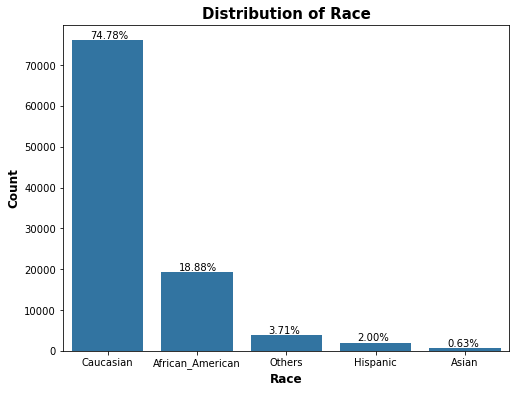

In [133]:
race = ['Caucasian','African_American', 'Others', 'Hispanic', 'Asian']
Count_plot(diabetes, 'race', race, 'Distribution of Race', 'Race', 'Count')

<span style = 'color:blue'>Evident from the distribution, it is seen that the **Caucasian** race has the highest occurrence of diabetic patients with **74.78%** of total treatments. This is followed by the **African_American** race with **18.88%**. The least with **0.63%** being the **Asian** race. There are patient's whose race are unidentified and labelled as **Others** with **3.71%**. The **Hispanic** race contains **2.00%** of the total patients observed.</span>